In [143]:
import dns.resolver
import pandas as pd
from collections import Counter

In [125]:
# Read in dga, skipping the preliminary lines with attribution info
dga_df = pd.read_csv('dga-feed-high.csv', header=None, skiprows=15)

In [126]:
dga_df.head()

,0,1,2,3
0,plvklpgwivery.com,Domain used by Cryptolocker - Flashback DGA fo...,2018-06-23,http://osint.bambenekconsulting.com/manual/cl.txt
1,dnuxdhcgblsgy.net,Domain used by Cryptolocker - Flashback DGA fo...,2018-06-23,http://osint.bambenekconsulting.com/manual/cl.txt
2,qjlullhfkiowp.biz,Domain used by Cryptolocker - Flashback DGA fo...,2018-06-23,http://osint.bambenekconsulting.com/manual/cl.txt
3,elkidddodxdly.ru,Domain used by Cryptolocker - Flashback DGA fo...,2018-06-23,http://osint.bambenekconsulting.com/manual/cl.txt
4,rnbfwuprlwfor.org,Domain used by Cryptolocker - Flashback DGA fo...,2018-06-23,http://osint.bambenekconsulting.com/manual/cl.txt


In [127]:
# Keep only the first column
dga_df.drop(dga_df.columns[[1,2,3]], axis=1, inplace=True)
dga_df.head()

,0
0,plvklpgwivery.com
1,dnuxdhcgblsgy.net
2,qjlullhfkiowp.biz
3,elkidddodxdly.ru
4,rnbfwuprlwfor.org


In [128]:
# Assign column name
dga_df.columns = ['domain_name']
# Add column to label these domains malicious
dga_df['malicious'] = 1
dga_df.head()

,domain_name,malicious
0,plvklpgwivery.com,1
1,dnuxdhcgblsgy.net,1
2,qjlullhfkiowp.biz,1
3,elkidddodxdly.ru,1
4,rnbfwuprlwfor.org,1


In [129]:
# Read in the Cisco Umbrella dataset
cisco_df = pd.read_csv('top-1m.csv', header=None)
cisco_df.head()

,0,1
0,1,netflix.com
1,2,api-global.netflix.com
2,3,prod.netflix.com
3,4,push.prod.netflix.com
4,5,google.com


In [130]:
# Keep only the second column with the domain names
cisco_df.drop(cisco_df.columns[[0]], axis=1, inplace=True)
cisco_df.head()

,1
0,netflix.com
1,api-global.netflix.com
2,prod.netflix.com
3,push.prod.netflix.com
4,google.com


In [131]:
# Assign column name
cisco_df.columns = ['domain_name']
# Add column to label these domains as not malicious
cisco_df['malicious'] = 0
cisco_df.head()

,domain_name,malicious
0,netflix.com,0
1,api-global.netflix.com,0
2,prod.netflix.com,0
3,push.prod.netflix.com,0
4,google.com,0


In [132]:
# Combine the two sets
combined = pd.concat([cisco_df, dga_df], ignore_index=True)
combined.head()

,domain_name,malicious
0,netflix.com,0
1,api-global.netflix.com,0
2,prod.netflix.com,0
3,push.prod.netflix.com,0
4,google.com,0


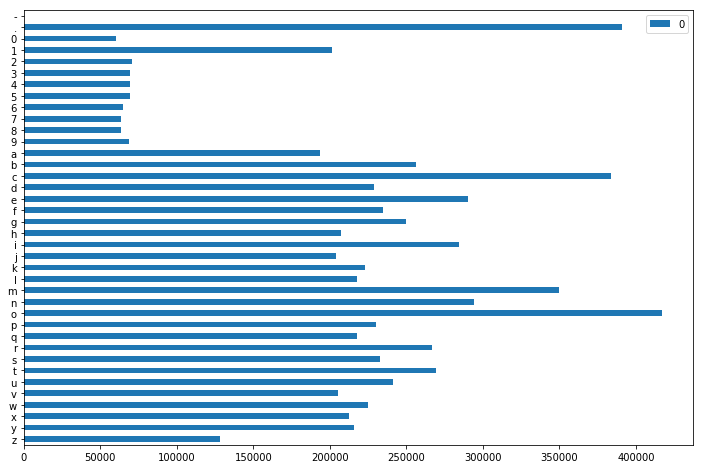

In [133]:
# Calculate and chart character frequencies for the dga domain names
letter_counts = Counter(dga_df['domain_name'].str.cat())
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.sort_index(axis=0,ascending=False).plot(kind='barh', figsize=[12,8])

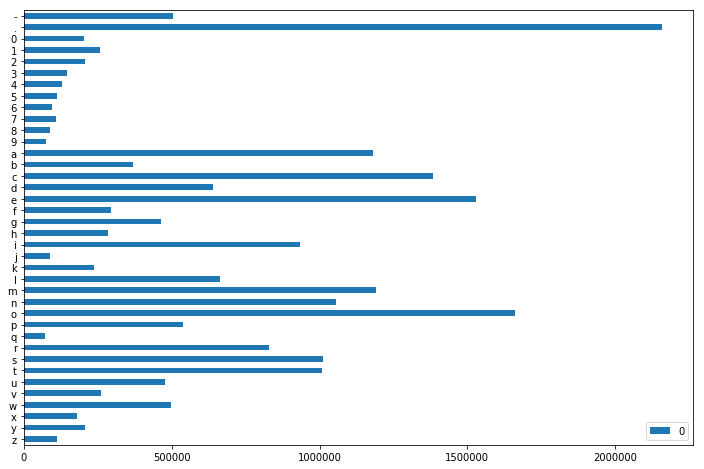

In [134]:
# Calculate and chart character frequencies for the Cisco domain names
letter_counts = Counter(cisco_df['domain_name'].str.cat())
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.sort_index(axis=0,ascending=False).plot(kind='barh', figsize=[12,8])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F922481D0>,
      dtype=object)

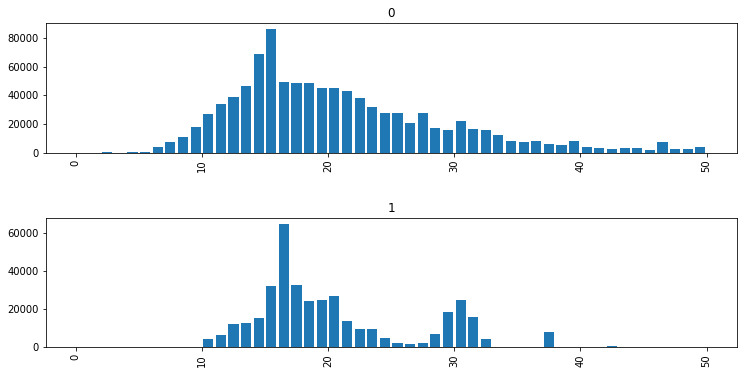

In [135]:
# Add a new column with the length of the domain name
combined['name_length'] = combined['domain_name'].str.len()
combined.hist(column='name_length', bins=50, range=[0, 50], by='malicious', layout=[2,1], figsize=[12,6],rwidth=0.8)

In [158]:
# Mean and median of domain lengths
print (combined.groupby('malicious')['name_length'].mean())
print (combined.groupby('malicious')['name_length'].median())

malicious
0    21.250845
1    20.085306
Name: name_length, dtype: float64
malicious
0    19
1    18
Name: name_length, dtype: int64


In [136]:
# Add a new column with the heirarchy count for the domain names
# using an intermediate step of breaking up the domain into its subdomains
combined['hierarchy'] = combined['domain_name'].str.split('.')
combined['hierarchy_count'] = [len(c) for c in combined['hierarchy']]

In [137]:
combined.head()

,domain_name,malicious,name_length,hierarchy,hierarchy_count
0,netflix.com,0,11,"[netflix, com]",2
1,api-global.netflix.com,0,22,"[api-global, netflix, com]",3
2,prod.netflix.com,0,16,"[prod, netflix, com]",3
3,push.prod.netflix.com,0,21,"[push, prod, netflix, com]",4
4,google.com,0,10,"[google, com]",2


In [138]:
# what is the max hierarchy count?
max(combined['hierarchy_count'])

34

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021010361A90>,
      dtype=object)

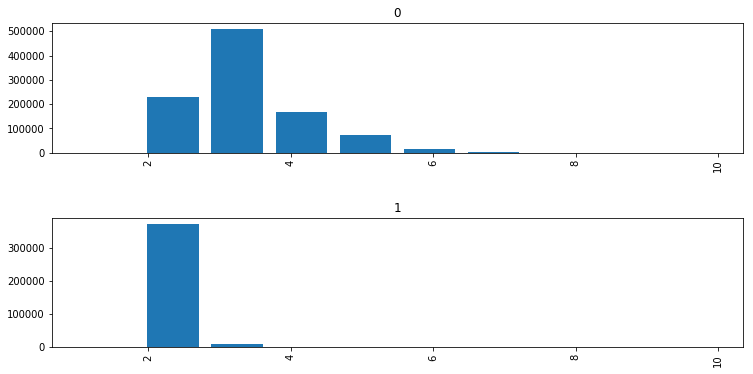

In [139]:
combined.hist(column='hierarchy_count', bins=10, by='malicious', range=[1, 10], layout=[2,1], figsize=[12,6], rwidth=0.8)

In [187]:
combined.head()

,domain_name,malicious,name_length,hierarchy,hierarchy_count
0,netflix.com,0,11,"[netflix, com]",2
1,api-global.netflix.com,0,22,"[api-global, netflix, com]",3
2,prod.netflix.com,0,16,"[prod, netflix, com]",3
3,push.prod.netflix.com,0,21,"[push, prod, netflix, com]",4
4,google.com,0,10,"[google, com]",2


In [188]:
combined.to_csv('combined.csv')